In [6]:
# Import the necessary packages
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt
import glob
import imageio

In [9]:
def load_images(filenames):
    return [imageio.imread(filename) for filename in filenames]

In [10]:
filenames =list(sorted(glob.glob("Calib_Images/*.jpg")))
imgs = load_images(filenames)

corners = [cv2.findChessboardCorners(img, (7,5)) for img in imgs]

C:\Users\javie\AppData\Local\Temp\ipykernel_21868\3789968186.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


In [11]:
imgs2 = copy.deepcopy(imgs)
tmp = [cv2.drawChessboardCorners(img, (7,5), cor[1], cor[0]) for img, cor in zip(imgs2, corners)]

valid_corners = [cor[1] for cor in corners if cor[0]]
num_valid_images = len(valid_corners)

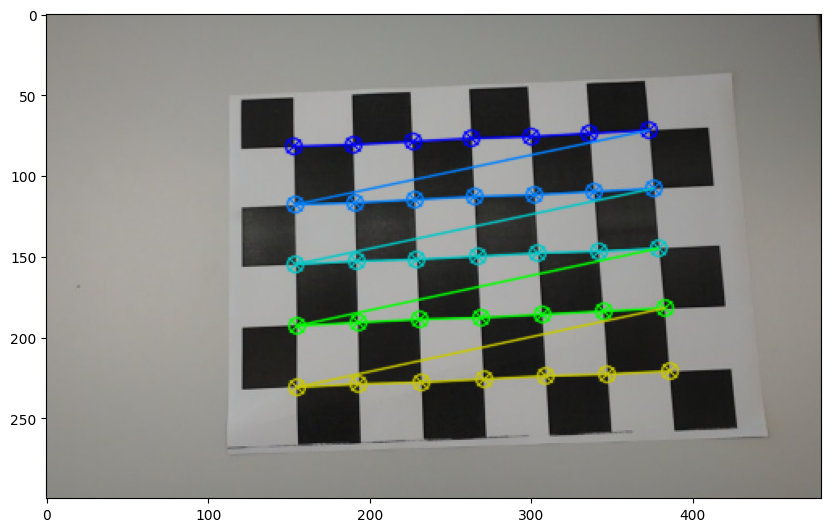

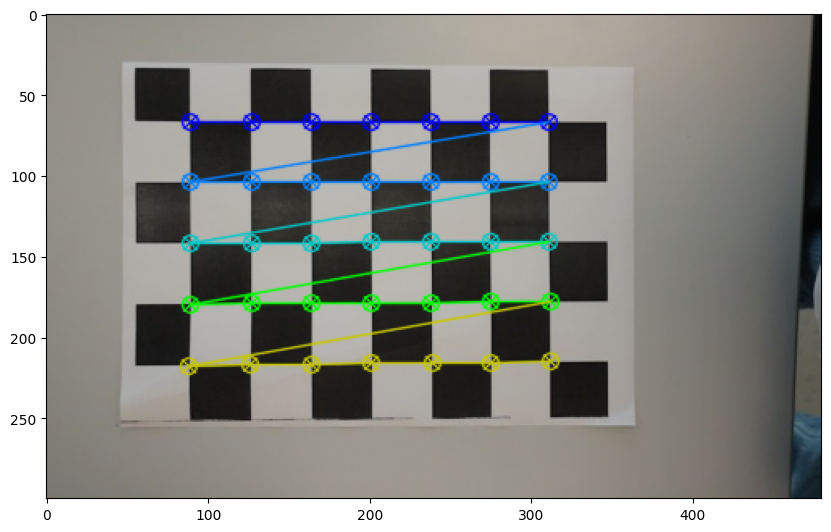

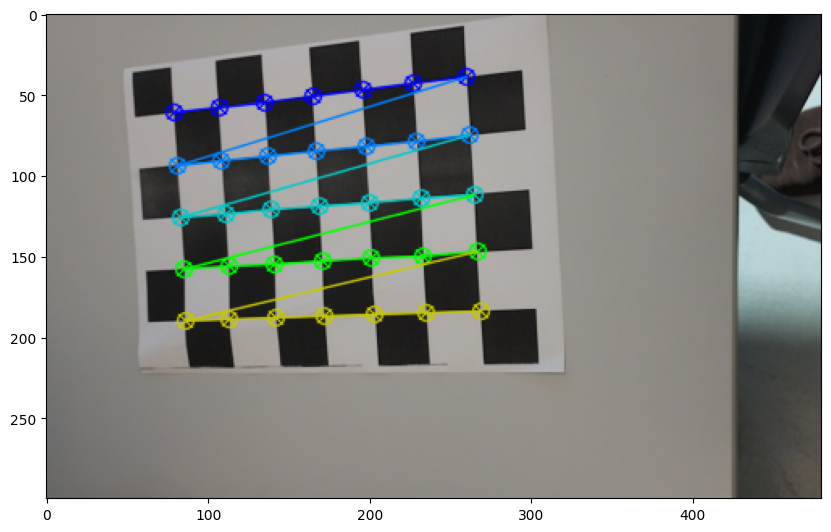

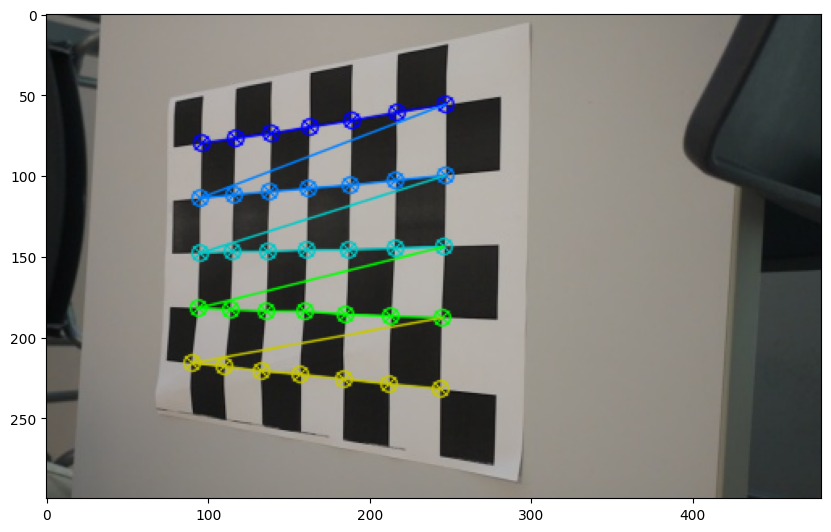

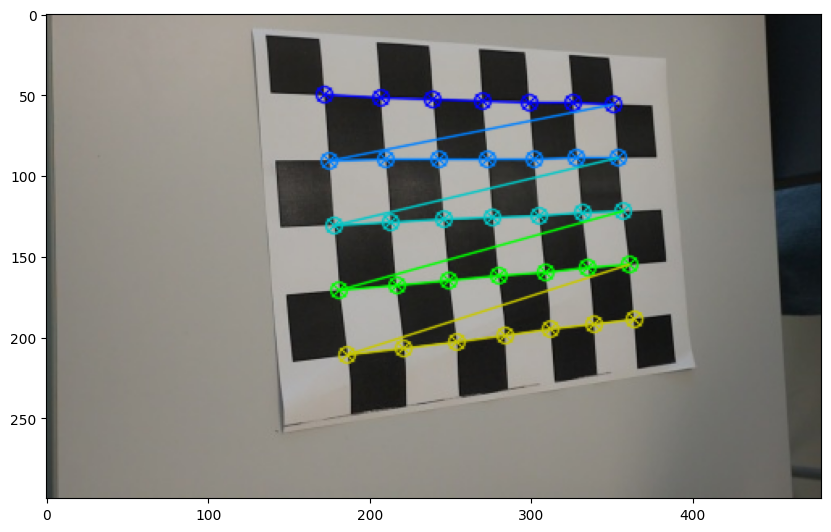

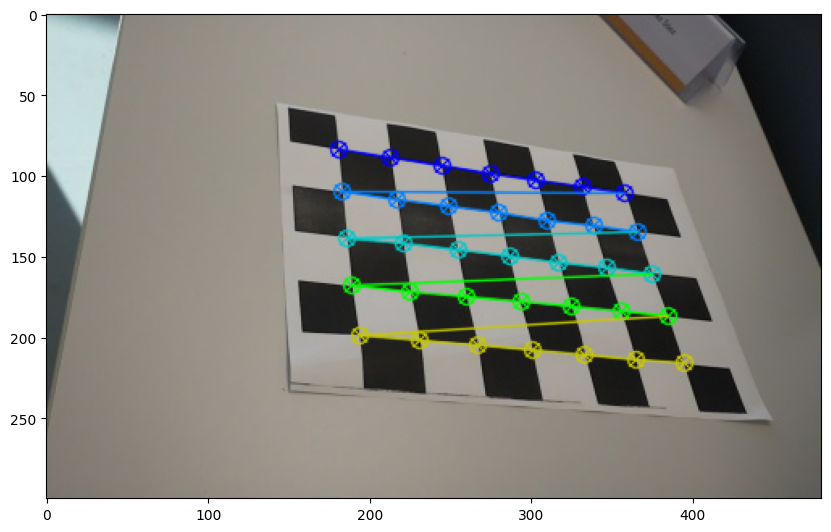

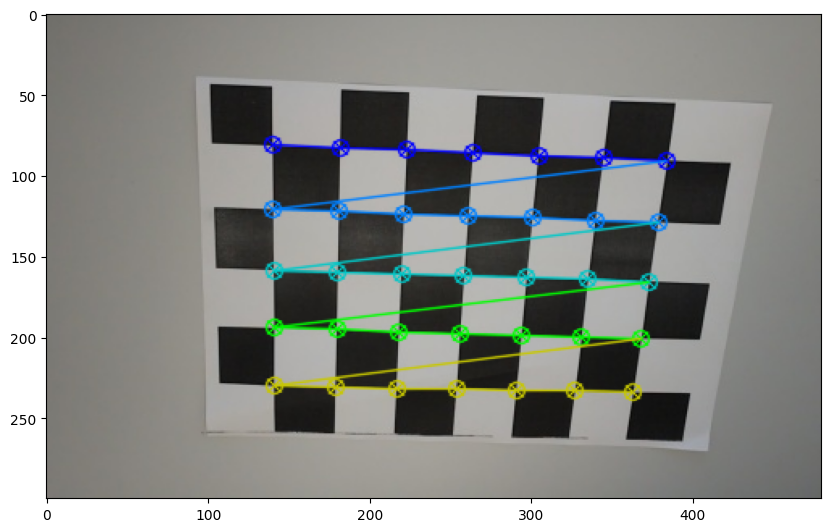

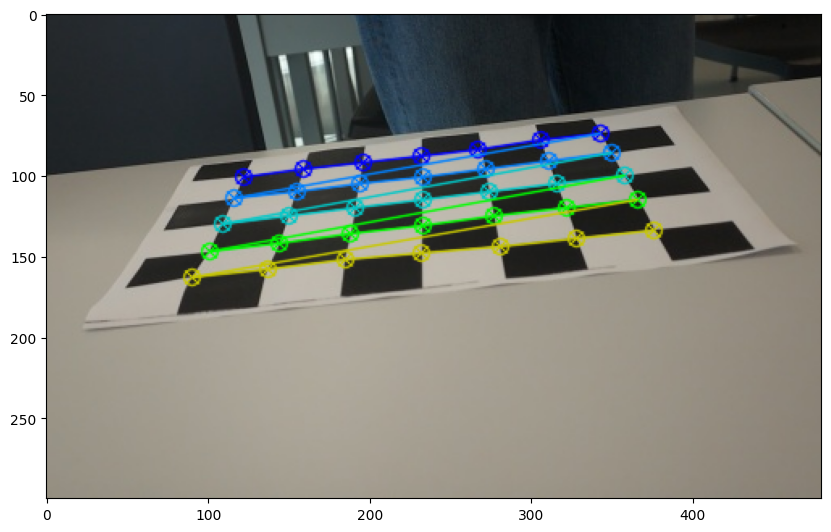

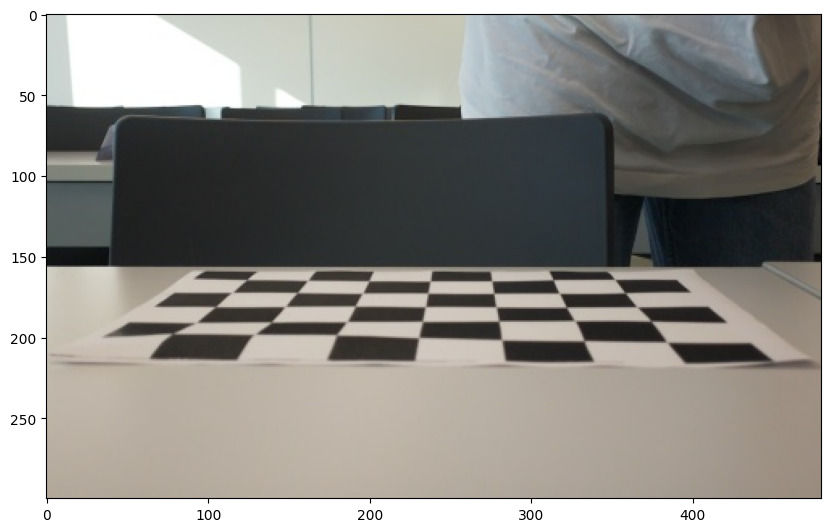

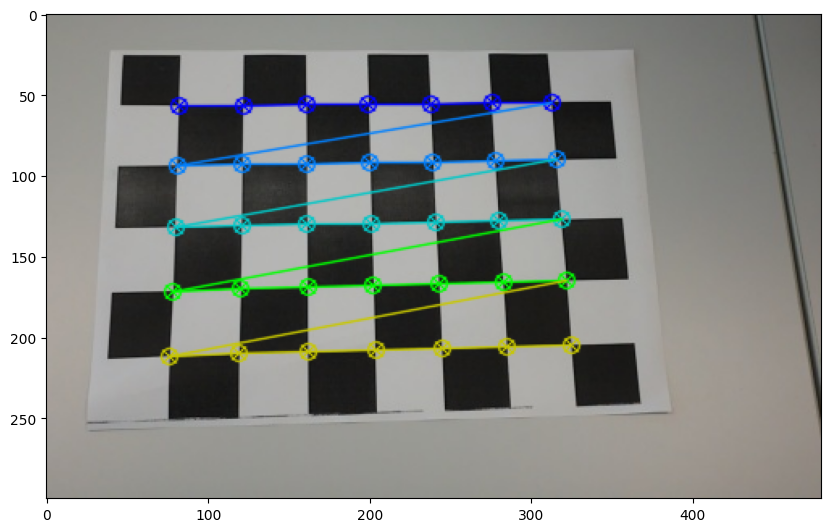

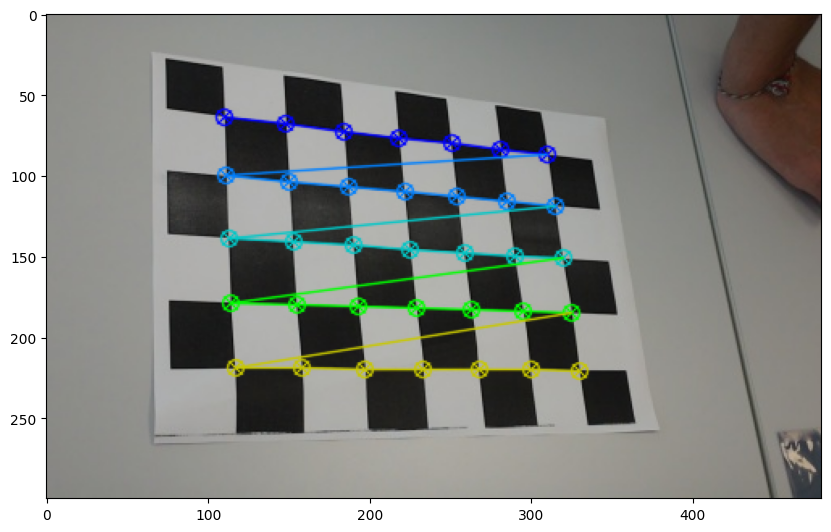

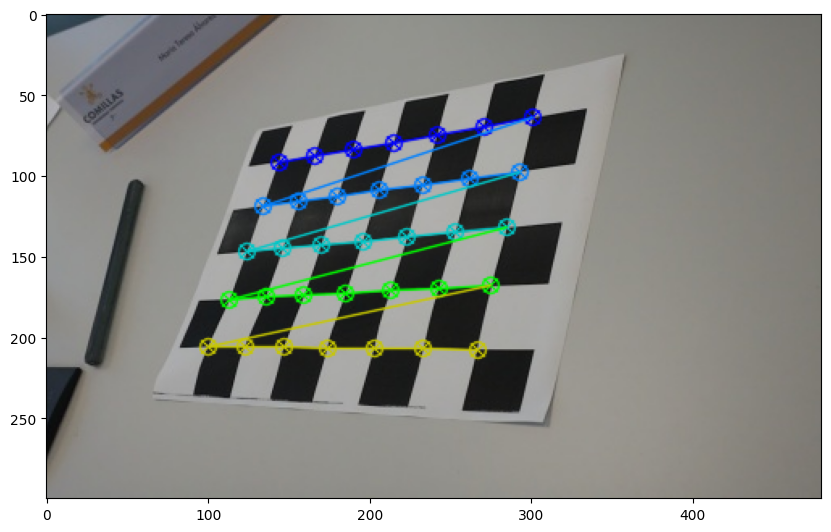

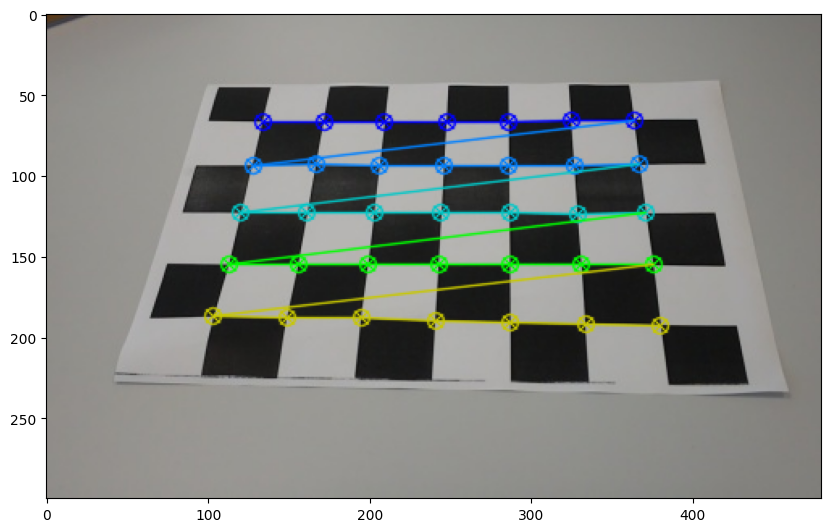

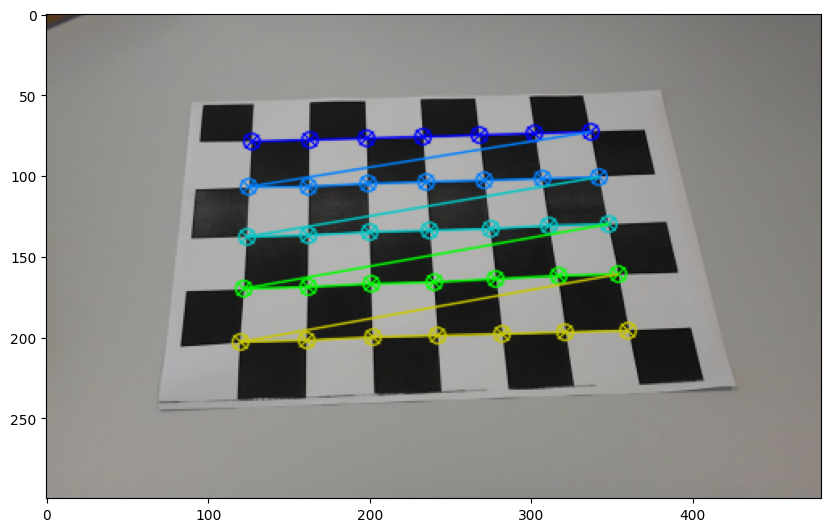

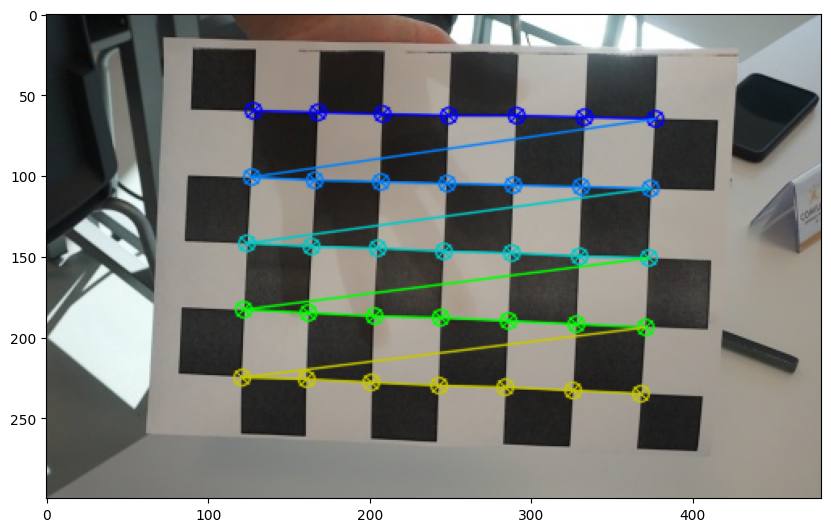

In [19]:
for img in imgs2:
    plt.figure(figsize=(10, 10))
    plt.imshow(img)

Calibración de la cámara


In [ ]:
def get_chessboard_points(shape, dx, dy):
    return [[(i%shape[0])*dx, (i//shape[0])*dy, 0] for i in range(np.prod(shape))]

chessboard_points = get_chessboard_points((7,5), 34, 34.5)

In [ ]:
# Coordinates of the corners
object_points = np.asarray([chessboard_points for _ in range(num_valid_images)], dtype=np.float32)
# Coordinates of the corners in the images
image_points = np.asarray(valid_corners, dtype=np.float32)

# Calibrate the camera
rms, intrinsics, distorsion, rvectors, tvectors = cv2.calibrateCamera(object_points, image_points, imgs[1].shape[:2], None, None, flags=cv2.CALIB_FIX_ASPECT_RATIO)

print("RMS:", rms)
print("Intrinsics:", intrinsics)
print("Distorsion:", distorsion)

extrinsics = list(map(lambda rv, tv: np.hstack((cv2.Rodrigues(rv)[0], tv)), rvectors, tvectors))
